# Bài tập thực hành 1
## Xây dựng mô hình SVM trên dữ liệu bệnh tiểu đường

### 1. Tải thư viện và nạp dữ liệu

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Nạp dữ liệu bệnh tiểu đường từ Kaggle
df = pd.read_csv('diabetes.csv')

# Xem qua dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\n5 hàng đầu tiên:")
print(df.head())
print("\nMô tả thống kê:")
print(df.describe())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

5 hàng đầu tiên:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29 

### 2. Tiền xử lý dữ liệu

In [2]:
# Xử lý giá trị 0 không hợp lệ (Glucose, BloodPressure, BMI, Insulin, SkinThickness không thể là 0)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column] = df[column].replace(0, df[column].median())

# Tách đặc trưng (X) và nhãn (y) - Outcome: 0 (không tiểu đường), 1 (tiểu đường)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Chuẩn hóa dữ liệu (quan trọng cho SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train: (614, 8)
Kích thước tập test: (154, 8)


### 3. Xây dựng và huấn luyện mô hình SVM (Linear Kernel)

In [3]:
# Khởi tạo và huấn luyện mô hình SVM với kernel Linear
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_linear = svm_linear.predict(X_test)

# Đánh giá mô hình
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM (Linear Kernel): {accuracy_linear:.2f}")
print("\nClassification Report (Linear):")
print(classification_report(y_test, y_pred_linear))

Accuracy of SVM (Linear Kernel): 0.77

Classification Report (Linear):
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



### 4. Thử nghiệm với các kernel khác (RBF và Polynomial)

In [4]:
# SVM với kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM (RBF Kernel): {accuracy_rbf:.2f}")

# SVM với kernel Polynomial
svm_poly = SVC(kernel='poly', degree=3, C=1, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy of SVM (Polynomial Kernel): {accuracy_poly:.2f}")

print("\nClassification Report (RBF):")
print(classification_report(y_test, y_pred_rbf))

Accuracy of SVM (RBF Kernel): 0.75
Accuracy of SVM (Polynomial Kernel): 0.75

Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



### 5. Vẽ biểu đồ so sánh độ chính xác của các kernel

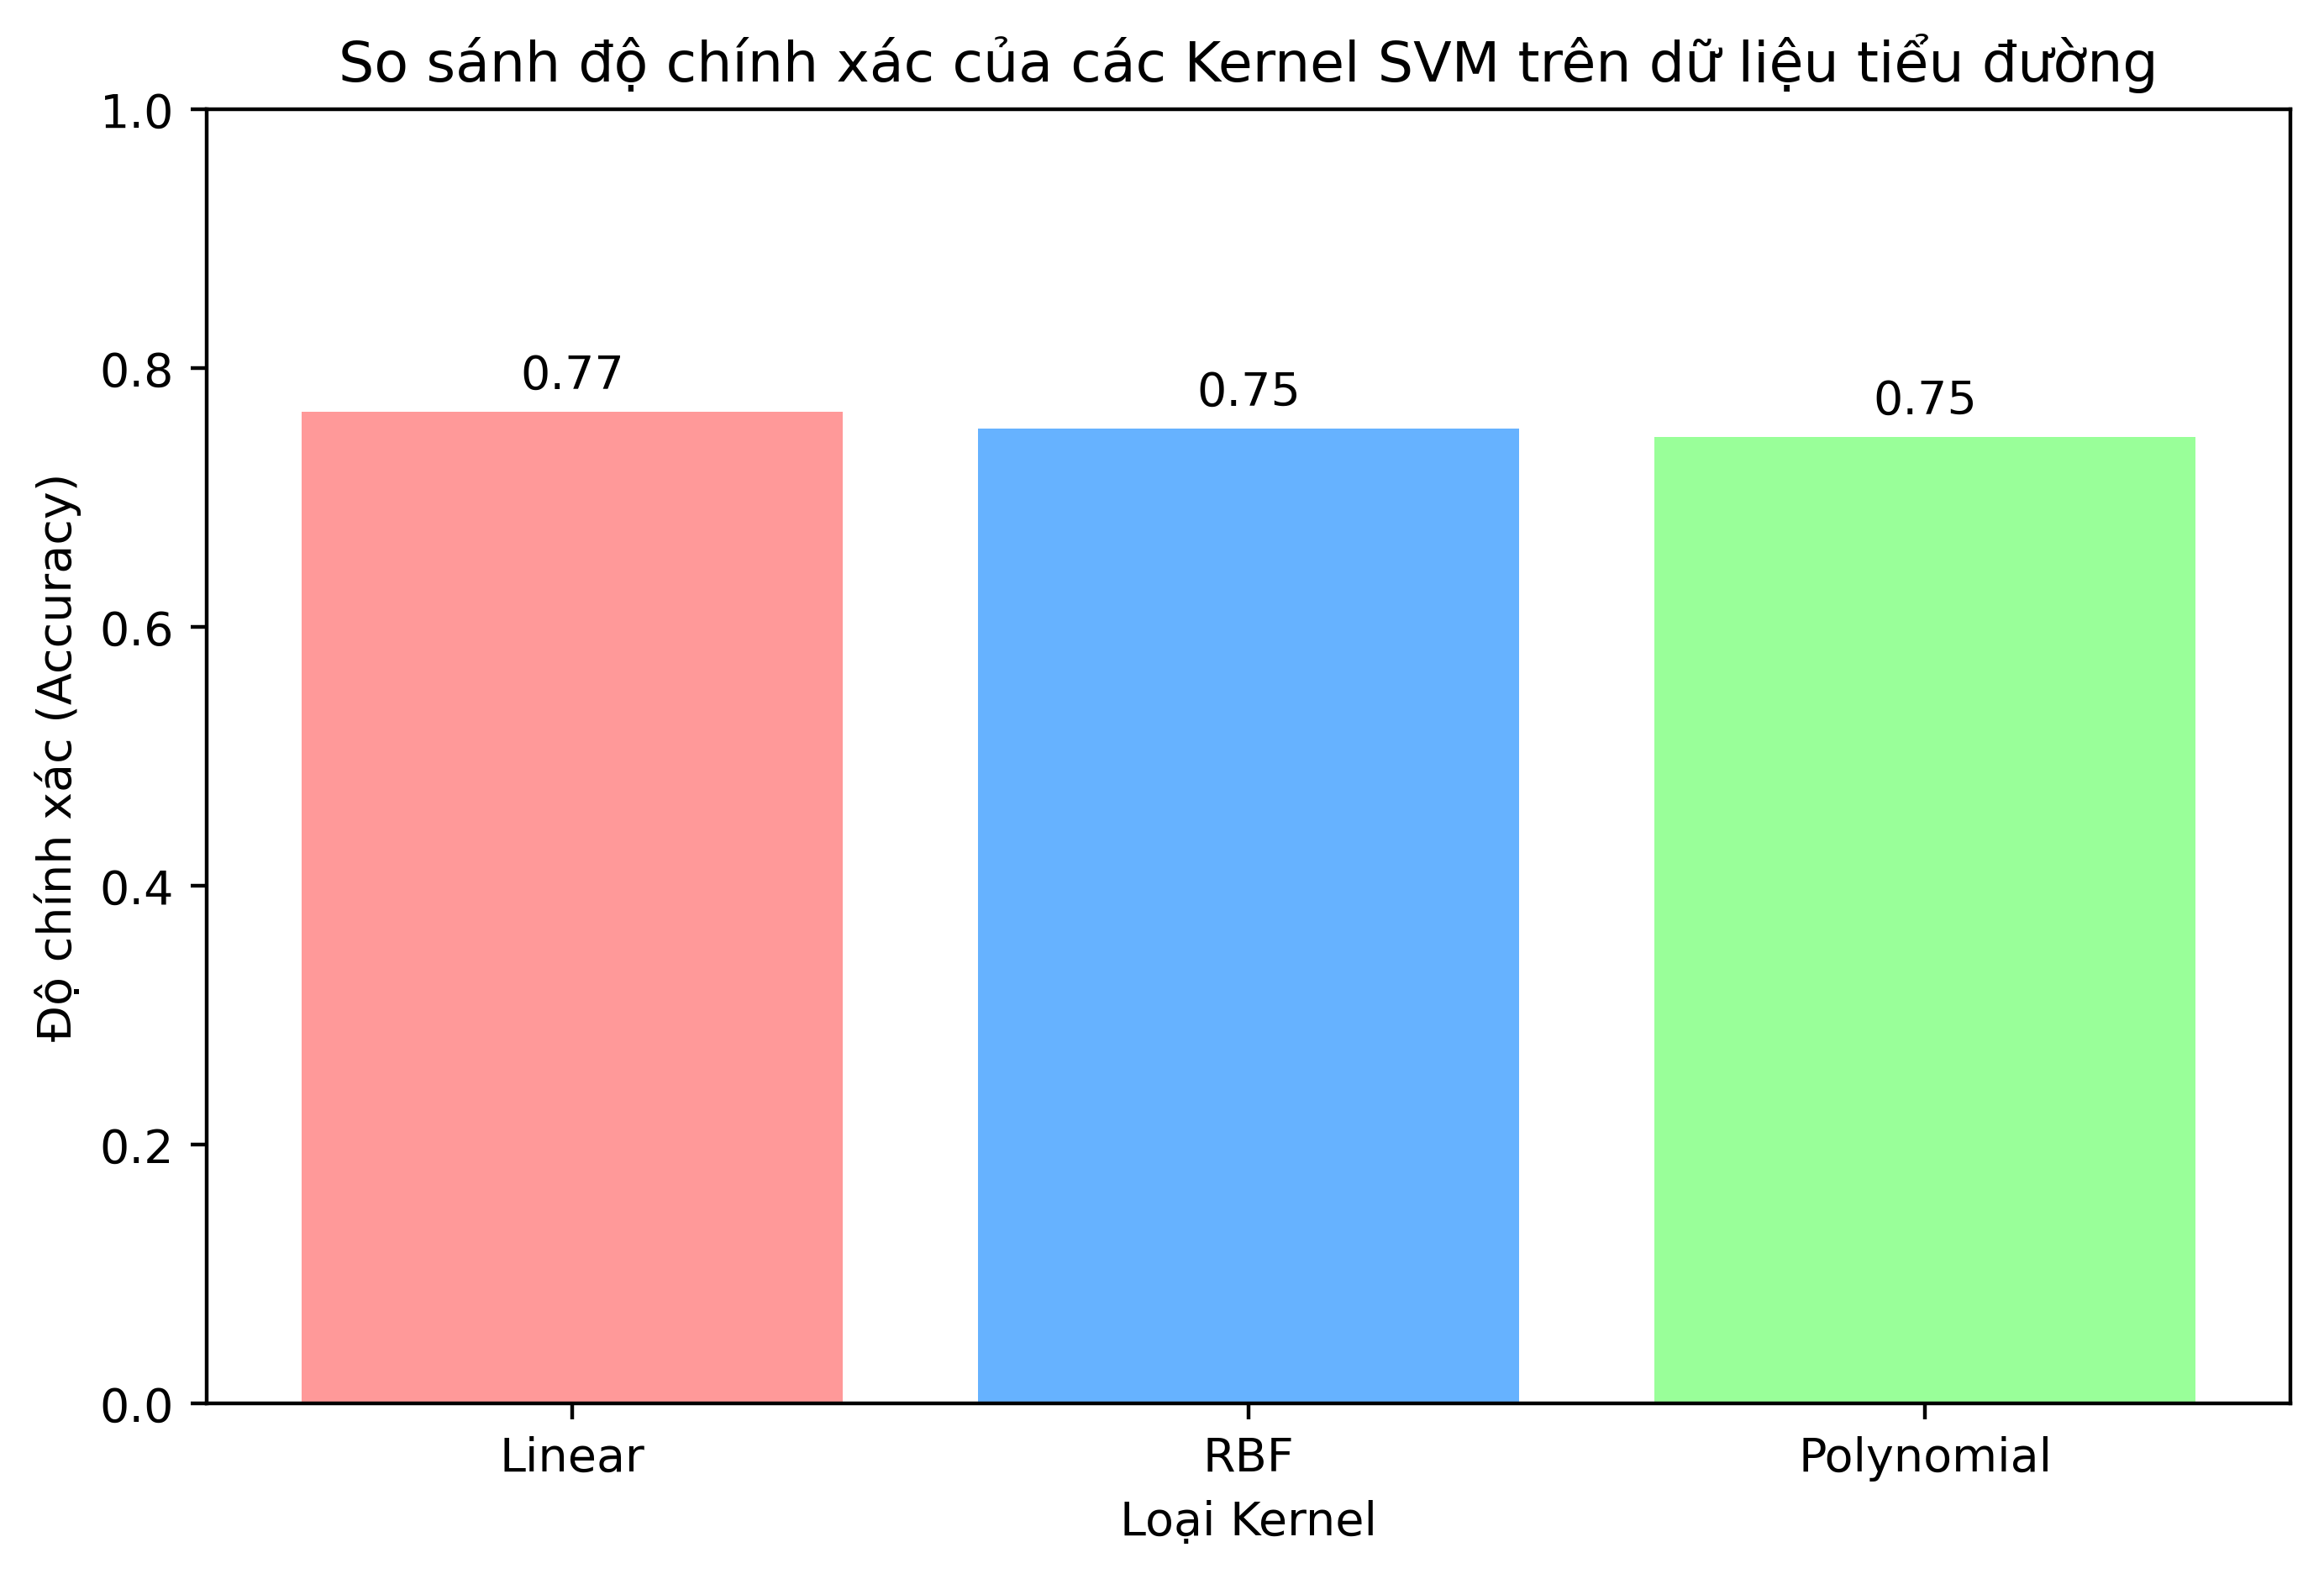

In [5]:
# Dữ liệu để vẽ biểu đồ
kernels = ['Linear', 'RBF', 'Polynomial']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('So sánh độ chính xác của các Kernel SVM trên dữ liệu tiểu đường')
plt.xlabel('Loại Kernel')
plt.ylabel('Độ chính xác (Accuracy)')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

### 6. Đánh giá với Confusion Matrix (cho SVM RBF - kernel tốt nhất)

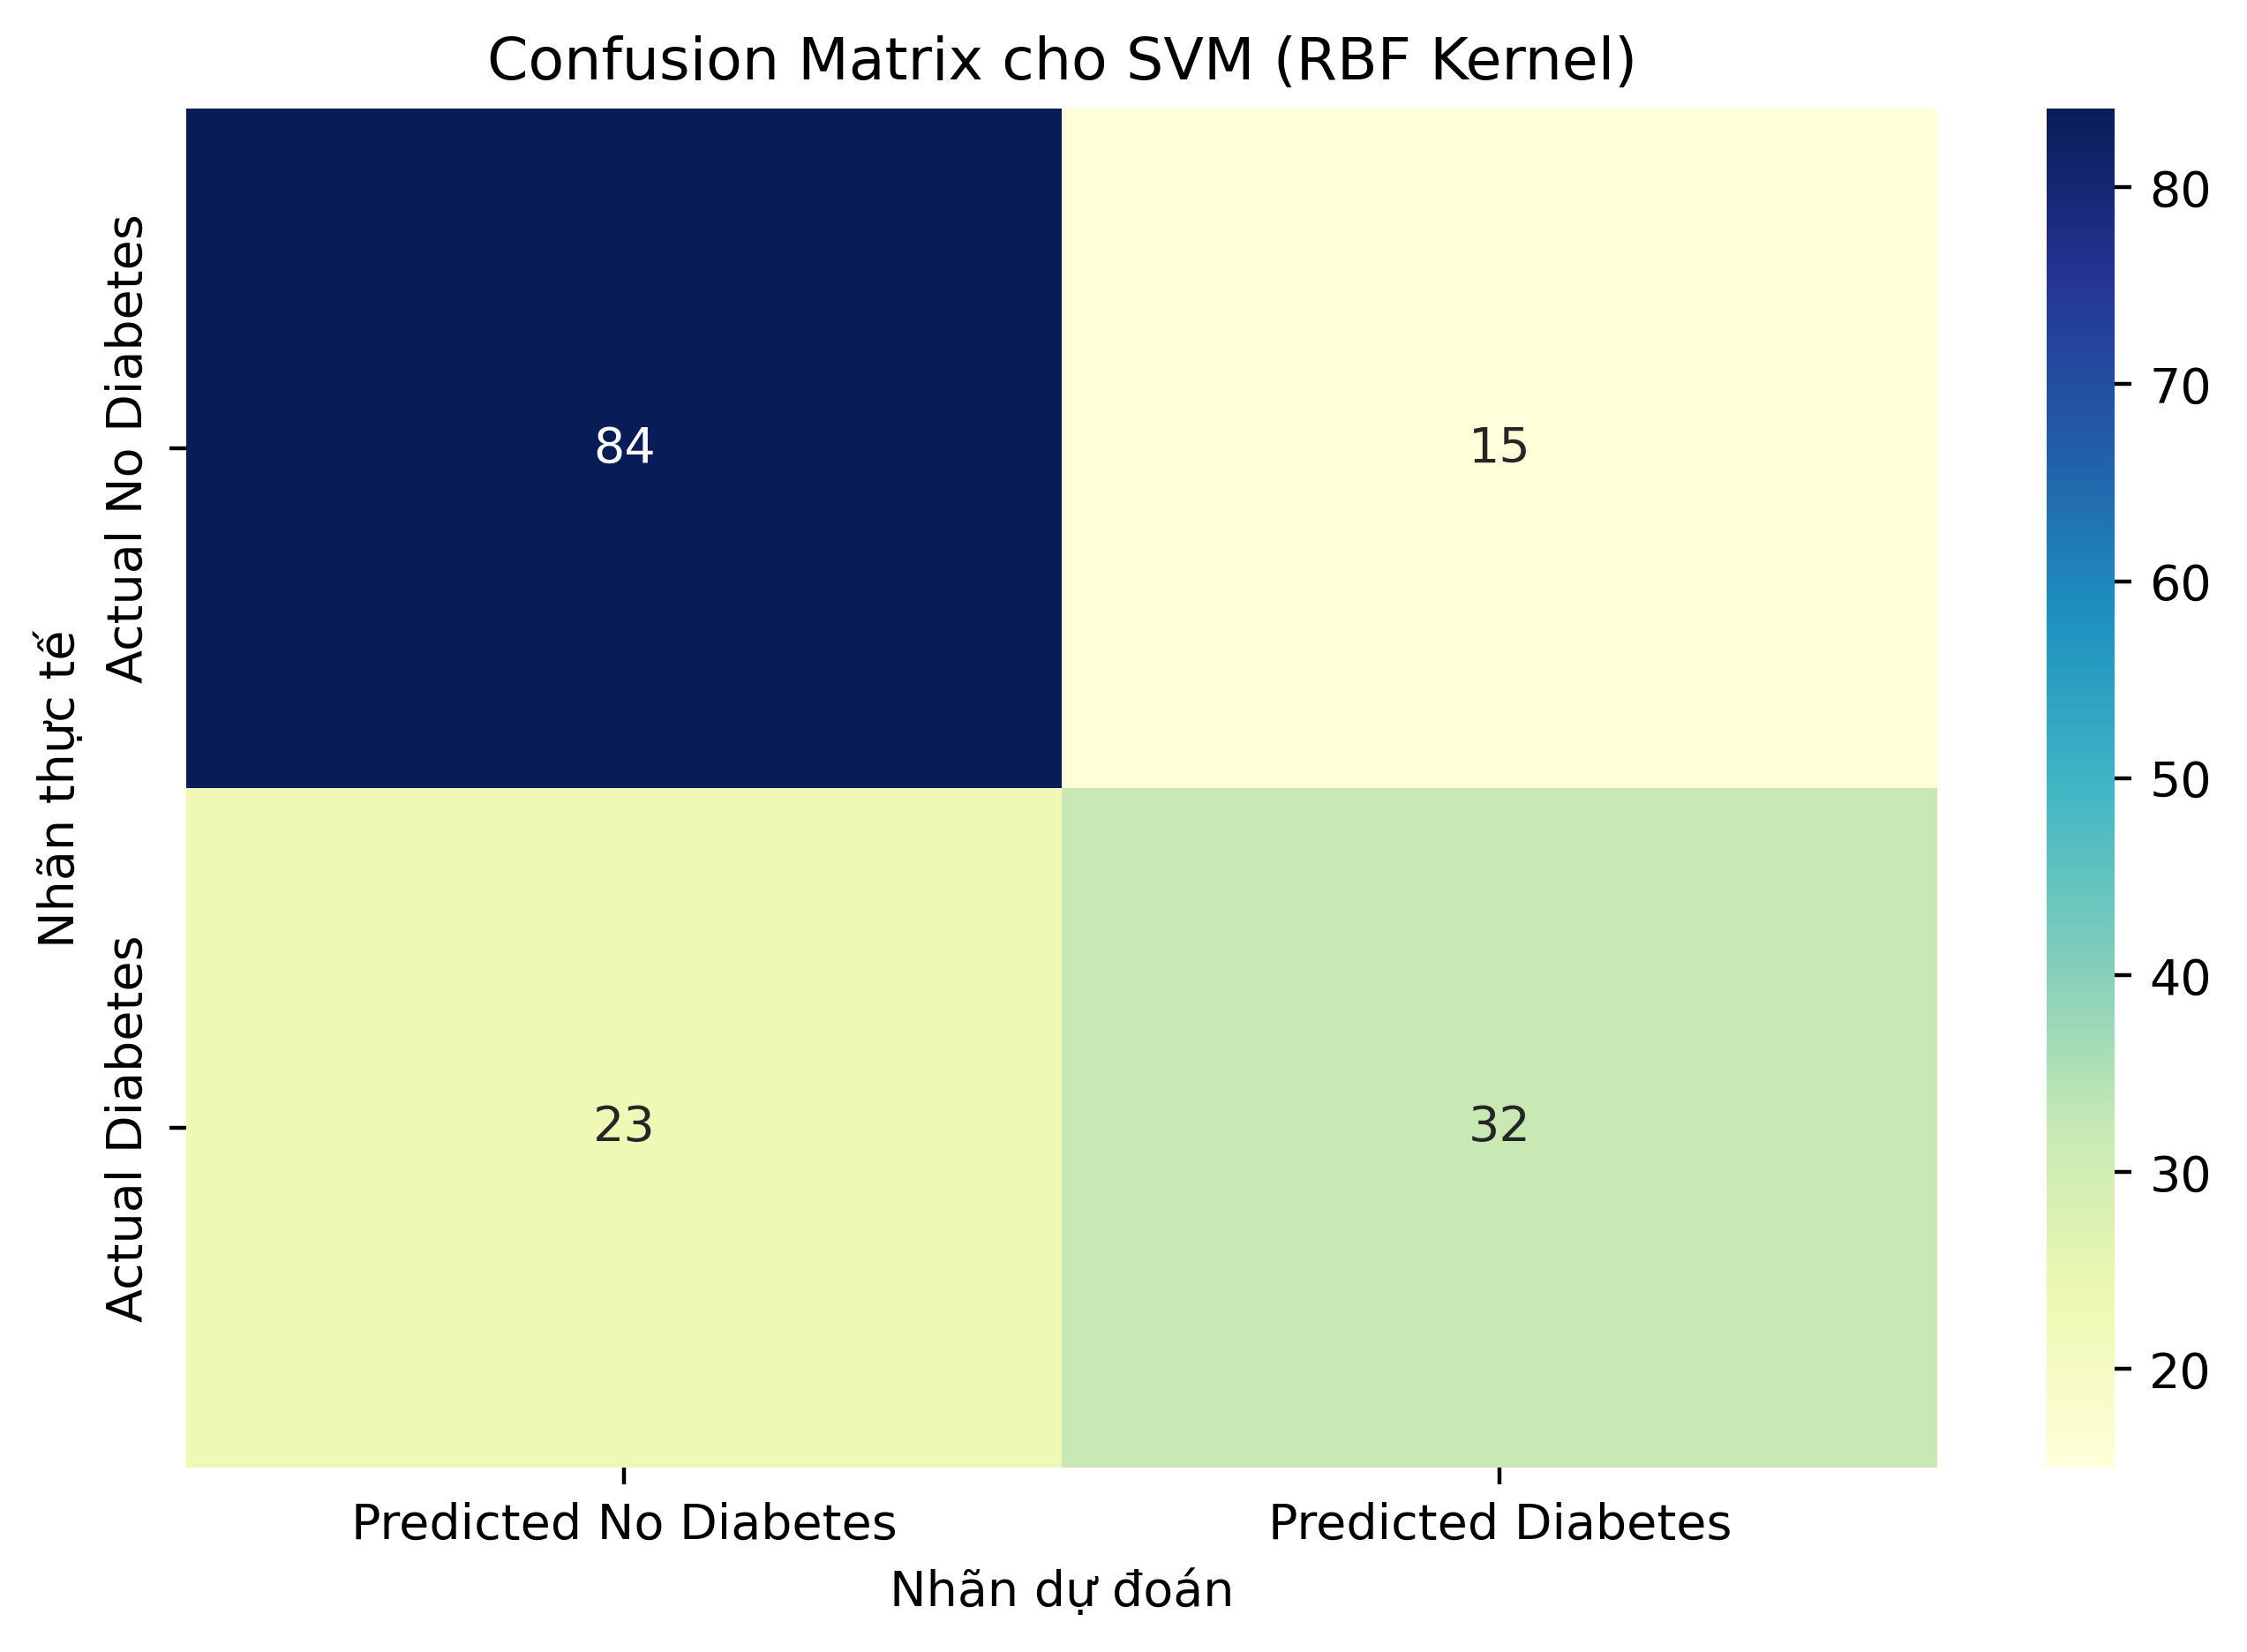

Confusion Matrix:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                     84                  15
Actual Diabetes                        23                  32


In [6]:
# Tính Confusion Matrix cho SVM RBF
cm = confusion_matrix(y_test, y_pred_rbf)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted No Diabetes', 'Predicted Diabetes'], 
                          index=['Actual No Diabetes', 'Actual Diabetes'])

# Vẽ Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix cho SVM (RBF Kernel)')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

### 7. Tối ưu hóa tham số với GridSearchCV (cho RBF Kernel)

In [7]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Định nghĩa lưới tham số cho RBF
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# In tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.2f}")
print("\nClassification Report (Best SVM):")
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM Accuracy: 0.77

Classification Report (Best SVM):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

